# SVM for regression

The Lagrangian function of SVM regression problem is given by

$$L(\mathbf{a},\mathbf{\hat{a}}) = -\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N (a_n - \hat{a}_n)(a_m - \hat{a}_m) k(\mathbf{x}_n,\mathbf{x}_m) - \epsilon\sum_{n=1}^N (a_n+\hat{a}_n) + \sum_{n=1}^N(a_n-\hat{a}_n)t_n$$

And our goal is to solve the following problem by making use of SMO.

$$\underset{0\leqslant\mathbf{a}\leqslant C, 0\leqslant\mathbf{\hat{a}}\leqslant C}{\quad max\quad } L \quad s.t.\ \sum_{n=1}^N (a_n - \hat{a}_n) = 0 \quad\text{and}\quad 
\left\{\begin{array}{ll}
\text{if } a_n\neq 0, &\hat{a}_n = 0\\
\text{if } \hat{a}_n\neq 0, &a_n = 0\\
\end{array}\right.$$

Let $\lambda_n = a_n - \hat{a}_n$, by considering the constraint of these multipliers, we have $|\lambda_n| = a_n + \hat{a}_n$, and the range of $\lambda_n$ is $[-C, C]$. We can then sustitute $\lambda_n$ in to the Lagrangian function to obtain

$$L = -\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N \lambda_n\lambda_m k(\mathbf{x}_n,\mathbf{x}_m) - \epsilon\sum_{n=1}^N |\lambda_n| + \sum_{n=1}^N\lambda_n t_n$$

Now our goal becomes

$$\underset{-C\leqslant\mathbf{\lambda}\leqslant C}{max} L \quad s.t.\ \sum_{n=1}^N \lambda_n = 0$$

which is equivalent to 

$$\underset{-C\leqslant\mathbf{\lambda}\leqslant C}{min} \Psi \quad s.t.\ \sum_{n=1}^N \lambda_n = 0\qquad \text{where}\quad \Psi = -L$$

--------------------

# KKT Conditions

The KKT conditions are from Lagrange multipler and are significant for SVM and SMO. The KKT conditions for the QP problem are particularly simple. The QP problem is solved when, for all $i$:

$$
\begin{array}{ll}
a_n = 0\text{ and }\hat{a}_n=0 &\Leftrightarrow &\lambda_n = 0 &\Leftrightarrow & |y_n - t_n| \leqslant \epsilon \\
0< (a_n \text{ or } \hat{a}_n)< C &\Leftrightarrow& 0<|\lambda_n|<C &\Leftrightarrow & |y_n - t_n| = \epsilon \\
(a_n \text{ or } \hat{a}_n) = C &\Leftrightarrow& |\lambda_n|=C &\Leftrightarrow & |y_n - t_n| \geqslant \epsilon 
\end{array}$$

where

- Points with $\lambda_n = 0$ are inside the $\epsilon$-tube.
- Points with $0<|\lambda_n|<C$ are at the boundary of the tube and support the tube.
- Points with $|\lambda_n| = C$ are outside the $\epsilon$-tube.


---------------

# SMO

Sequential Minimal Optimization (SMO) is a simple algorithm that can quickly solve the SVM QP (quadratic programming) problem without any extra matrix storage and without using numerical QP optimization steps at all. <font color='red'>SMO decomposes the overall QP problem into QP sub-problems</font>, using Osuna's theorem to ensure convergence.


## Smallest SVM QP problem

SMO chooses to solve the smallest possible optimization problem at every step. For the standard SVM QP problem, <font color='red'>the smallest possible optimization problem involves two parameters, because these parameters must obey a linear equality constraint.</font>

$$\sum_{n=1}^N \lambda_n = 0 \tag{2}$$

It is nonsense to choose only one parameter for optimization, because if so, $a_n$ has to be fixed for suiting the linear equality constraint such that we cannot optimize the parameter $a_n$. Hence, at every step, SMO chooses two parameters to jointly optimize.

$$\lambda_1 + \lambda_2 = - \sum_{n\neq 1,2}^N \lambda_n=w \tag{3}$$

where the sumation of $\lambda_1 + \lambda_2$ is fixed. And the optimized parameters $\lambda_1^{new}$ and $\lambda_2^{new}$ has to be subject to the same constraint

$$\lambda_1^{new} + \lambda_2^{new} = \lambda_1 + \lambda_2 = w \tag{4}$$

in order to keep meeting the linear equality constraint.


## Ranges of $\lambda_1$ and $\lambda_2$

There are two constriants on $a_1$ and $a_2$:

$$\begin{array}{ll}
\text{KKT requirement}&-C\leqslant \lambda_n \leqslant C\qquad \text{where}\quad n=1,\cdots,N\\
\text{linear equality constraint} &\lambda_1 + \lambda_2 = w
\end{array} \tag{5}$$

The KKT condition requires the point $(\lambda_2, \lambda_1)$ to lie in the square with length $2C$. And the linear equality constraint requires the point $(\lambda_2, \lambda_1)$ lie on the line that is denoted by $\lambda_1 + \lambda_2 = w$.

### Range of $\lambda_2$

$$\left.\begin{array}{ll}
\text{KKT requirement on }\lambda_1 &-C\leqslant \lambda_1 \leqslant C\\
\text{linear equality constraint} &\lambda_2 = w - \lambda_1
\end{array}\right\}
\Rightarrow 
\lambda_2 \in
[w-C, w+C] \tag{6}$$

And $\lambda_2$ must also be in the range $[-C, C]$, hence

$$\bbox[#e0f0ff]{a_2 \in [L, H]\qquad \text{where}\quad
\left\{\begin{array}{ll}
L=max(w-C, -C) \\
H=min(w+C, C)
\end{array}\right.}\tag{7}$$


### Range of $\lambda_1$

We shall use the linear equation $\lambda_1 + \lambda_2 = w$ to evaluate the value of $\lambda_1$. As long as $\lambda_2\in [L, H]$, the $\lambda_1$ that derives from $\lambda_2$ will also lie in the range of $[-C, C]$ and obey the linear equality constraint.


*If $L\geqslant H$, we cannot take the subsequent steps to optimize the pair of $\lambda_1$ and $\lambda_2$.*


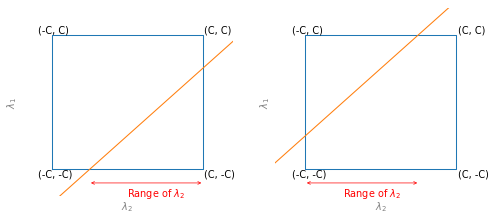

In [55]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-1.4, 1.4)
    ax.set_ylim(-1.4, 1.4)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(r"$\lambda_2$", fontsize=14, color='grey')
    ax.set_ylabel(r"$\lambda_1$", fontsize=14, color='grey')
    ax.text(-1.18, -1.1, "(-C, -C)", fontsize=14)
    ax.text(-1.18, 1.03, "(-C, C)", fontsize=14)
    ax.text(1.02, -1.1, "(C, -C)", fontsize=14)
    ax.text(1.02, 1.03, "(C, C)", fontsize=14)

def draw_line(ax, sign, k):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y)
    
def draw_range(ax, xstart, xend, y):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'r'})
    ax.text(xstart+(xend-xstart-.5)/2, y-.2, r"Range of $\lambda_2$", fontsize=14, color='r')

def main():
    fig=plt.figure(figsize=(12,5), dpi=50)
    (ax1,ax2) = fig.subplots(1, 2)
    draw_rec(ax1)
    draw_rec(ax2)
    
    K = np.array([-.5, .5])
    S = np.array([-1, -1])
    draw_line(ax1, S[0], K[0])
    draw_line(ax2, S[1], K[1])
    
    i = 0
    for ax in [ax1, ax2]:
        xnc = S[i]*K[i] - S[i]*-1
        xpc = S[i]*K[i] - S[i]*1
        # print(x0, xc)
        l = min(xnc, xpc)
        h = max(xnc, xpc)
        L = max(-1, l)
        H = min(1, h)
        draw_range(ax, L, H, -1.2)
        i+=1
    
    plt.show()
    return

if __name__=="__main__":
    main()



## Determine $a_2$

Firstly, we shall extract the terms that related to $\lambda_1$ and $\lambda_2$ from the objective function.

$$\begin{align*}
\Psi &= \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N \lambda_n\lambda_m k(\mathbf{x}_n,\mathbf{x}_m) + \epsilon\sum_{n=1}^N |\lambda_n| - \sum_{n=1}^N\lambda_n t_n\\
&=\underbrace{\frac{1}{2}\lambda_1 \lambda_1 k_{11} + \frac{1}{2}\lambda_2 \lambda_2 k_{22} + \lambda_1 \lambda_2 k_{12} + \lambda_1\sum_{n\neq 1,2}^N \lambda_n k_{1n} + \lambda_2\sum_{n\neq 1,2}^N \lambda_n k_{2n} + \epsilon(|\lambda_1| + |\lambda_2|) - \lambda_1t_1 - \lambda_2 t_2}_{\lambda_1,\lambda_2 \text{ related entries}\qquad \text{where }k_{ij}=k(\mathbf{x}_i,\mathbf{x}_j)} + constant\\
&=\underbrace{\frac{1}{2}\lambda_1^2 k_{11} + \frac{1}{2}\lambda_2^2 k_{22} + \lambda_1 \lambda_2 k_{12} + lambda_1 v_1 + \lambda_2 v_2 + \epsilon(|\lambda_1| + |\lambda_2|) - \lambda_1t_1 - \lambda_2 t_2}_{\text{where } v_i=\sum_{n\neq 1,2}^N \lambda_n k_{in}} + constant\\
&=\underbrace{\frac{1}{2}(w-\lambda_2)^2k_{11} + \frac{1}{2}\lambda_2^2k_{22} + (w-\lambda_2)\lambda_2k_{12} + (w-\lambda_2) v_1 + \lambda_2 v_2 + \epsilon(|w-\lambda_2|+|\lambda_2|) - (w-\lambda_2)t_1 - \lambda_2 t_2}_{\lambda_1+\lambda_2 = w} + constant\\
\end{align*} \tag{9}$$

which is a quadratic function over $\lambda_2$, and $\lambda_1$ has been transfered to the form denoted by $\lambda_2$ due to the constraint that <font color='red'>the sumation of $\lambda_1$ and $\lambda_2$ is fixed</font>.

### First-order derivative

We can take the first-order derivative of $\Psi$ with respect to $\lambda_2$ to obtain

$$\frac{d\Psi}{d\lambda_2} = -k_{11}(w-\lambda_2) + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}(w-\lambda_2) - v_1 + v_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + t_1 - t_2 \tag{11}$$


However, this function is not continuous due to the $sgn$ function, we therefore have to deal with several segments of the function separately.

### Second-order derivative

The second-order derivative of $\Psi$ with respect to $\lambda_2$ is given by

$$\frac{d^2\Psi}{d\lambda_2^2} = k_{11} + k_{22} - k_{12} - k_{12} \tag{12}$$

Here we only consider the case that the kernel function satisfy the Mercer's conditions, which require the kernel $K$ is continuous and is given by

$$k_{mn} = K(\mathbf{x}_n, \mathbf{x}_m) = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m)$$

With the Mercer's conditions, the second-order derivatives will always be positive provided $\mathbf{x}_1$ not equal to $\mathbf{x}_2$.

$$\begin{align*}\eta = \frac{d^2\Psi}{d\lambda_2^2} &= k_{11} + k_{22} - 2k_{12}\\
&= \phi(\mathbf{x}_1)^T\phi(\mathbf{x}_1) + \phi(\mathbf{x}_2)^T\phi(\mathbf{x}_2) - 2\phi(\mathbf{x}_1)^T\phi(\mathbf{x}_2) \\
&= \big(\phi(\mathbf{x}_1) - \phi(\mathbf{x}_2)\big)^2\\
&>0\qquad \text{if }\mathbf{x}_1\neq \mathbf{x}_2
\end{align*}$$

Moreover, after adjustment, the first-order derivative with respect to $\lambda_2$ takes the form 

$$\frac{d\Psi}{d\lambda_2} = \eta \lambda_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + constant$$

which is a discontinuous first-degree function of $\lambda_2$ with a positive gradient, and can be depict as follows.

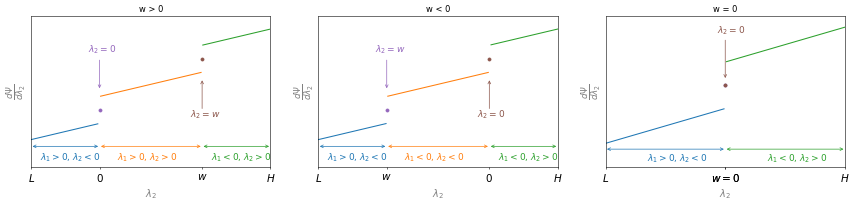

In [35]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x, eta, w, epsilon: eta*x + epsilon*(-np.sign(w-x) + np.sign(x)) + 1

def draw_line(ax, eta, w, epsilon, L, H):
    if w > 0:
        s1 = 0
        s2 = w
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1>0$, $\lambda_2>0$'
        right_text = r'$\lambda_1<0$, $\lambda_2>0$'
        s1_text = r'$\lambda_2 = 0$'
        s2_text = r'$\lambda_2 = w$'
    elif w <= 0:
        s1 = w
        s2 = 0
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1<0$, $\lambda_2<0$'
        right_text = r'$\lambda_1<0$, $\lambda_2>0$'
        s1_text = r'$\lambda_2 = w$'
        s2_text = r'$\lambda_2 = 0$'
    
    x = np.linspace(-10, s1, 100)[:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s1
    ys1 = f(x, eta, w, epsilon)
    ax.scatter(x, ys1, s=20, color='C4')    
    
    x = np.linspace(s1, s2, 100)[1:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s2
    ys2 = f(x, eta, w, epsilon)
    ax.scatter(x, ys2, s=20, color='C5') 
    
    x = np.linspace(s2, 10, 100)[1:]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    YL = f(L, eta, w, epsilon)-.5
    draw_range(ax, L, s1, YL, left_text, 3, 'C0')
    if w != 0:
        draw_range(ax, s1, s2, YL, mid_text, 4, 'C1')
    draw_range(ax, s2, H, YL, right_text, 3, 'C2')
    if w != 0:
        draw_arrow(ax, s1, ys2, ys1, s1_text, -.7, 'C4')
        draw_arrow(ax, s2, ys1, ys2, s2_text, -.7, 'C5')
    else:
        draw_arrow(ax, s2, ys1+4, ys1-1, s2_text, -.7, 'C5')

    
def draw_range(ax, xstart, xend, y, text, adjust, color):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':color})
    ax.text(xstart+(xend-xstart-adjust)/2, y-1, text, fontsize=13, color=color)
    
def draw_arrow(ax, x, ystart, yend, text, adjust, color):
    if ystart > yend:
        delta_y = 1
    else:
        delta_y = -1
    ax.annotate(
        '', xy=(x, yend+1.5*delta_y), xycoords='data',
        xytext=(x, ystart), textcoords='data',
        arrowprops={'arrowstyle': '->', 'color':color})
    ax.text(x+adjust, ystart+delta_y*.5, text, fontsize=13, color=color)

def draw_pict(ax, w, C, eta, epsilon):
    L = max(-C, w-C)
    H = min(C, w+C)
    
    ax.set_xlim(L, H)
    ax.set_ylim(f(L, eta, w, epsilon)-2, f(H, eta, w, epsilon)+1)
    ax.set_xlabel(r"$\lambda_2$", fontsize=14, color='grey')
    ax.set_ylabel(r"$\frac{d\Psi}{d\lambda_2}$", fontsize=18, color='grey')
    
    if w > 0:
        s1 = 0
        s2 = w
        s1_text = r'$0$'
        s2_text = r'$w$'
    elif w < 0:
        s1 = w
        s2 = 0
        s1_text = r'$w$'
        s2_text = r'$0$'
    else:
        s1 = s2 = 0
        s1_text = s2_text = r'$w=0$'
    ax.set_xticks([L, s1, s2, H])
    ax.set_yticks([])
    ax.set_xticklabels([r"$L$", s1_text, s2_text, r"$H$"], fontsize=15)
    
    draw_line(ax, eta, w, epsilon, L, H)
    
def main():
    fig=plt.figure(figsize=(21,4), dpi=50)
    ax1, ax2, ax3 = fig.subplots(1, 3)
    
    eta = .3
    epsilon = 1
    C = 10
    
    ax1.set_title('w > 0')
    w = 6
    draw_pict(ax1, w, C, eta, epsilon)
    
    ax2.set_title('w < 0')
    w = -6
    draw_pict(ax2, w, C, eta, epsilon)
    
    ax3.set_title('w = 0')
    w = 0
    draw_pict(ax3, w, C, eta, epsilon)
    
    plt.show()
    return

if __name__=="__main__":
    main()


As we can see, the derivative function may be partitioned into several segements. If the optimum of $\lambda_2$ lies on the line segments, we can make use of the Newton method which is given by a closed form to obtain the optimum of $\lambda_2$.

$$\begin{align*}
\lambda_2^{new} 
&= = \lambda_2 - (\frac{d^2 \Psi}{d \lambda_2^2})^{-1}\frac{d\Psi}{d\lambda_2}\\
&= \lambda_2 - \frac{ -k_{11}(w-\lambda_2) + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}(w-\lambda_2) - v_1 + v_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + t_1 - t_2 }{\eta}\qquad\text{let }\bbox[#e0f0ff]{\eta=k_{11} + k_{22} - 2k_{12}}\\
&= \lambda_2 -\frac{-k_{11}\lambda_1 + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}\lambda_1 - v_1 + v_2 + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2)) + t_1 - t_2 }{\eta}\\
&= \lambda_2 -\frac{-\big(k_{11}\lambda_1 + k_{12}\lambda_2 + v_1 - t_1\big)+ \big(k_{22}\lambda_2 + k_{12}\lambda_1 + v_2 -t_2\big) + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2)) }{\eta}\\
&= \lambda_2 -\frac{-\big(\sum_{n=1}^N \lambda_n k_{1n}-t_1\big) + \big(\sum_{n=1}^N \lambda_nk_{2n}-t_2\big) + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2))}{\eta}\\
&= \lambda_2 +\frac{\big(\sum_{n=1}^N \lambda_nk_{1n} + b - t_1\big) - \big(\sum_{n=1}^N \lambda_nk_{2n} + b - t_2\big)- \epsilon(-sgn(\lambda_1)+sgn(\lambda_2))}{\eta}\\
&= \lambda_2 +\frac{\big(y_1 - t_1\big) - \big(y_2 - t_2\big)+ \epsilon(sgn(\lambda_1)-sgn(\lambda_2))}{\eta}\\
&= \bbox[#e0f0ff]{\lambda_2 + \frac{E_1-E_2+ \epsilon(sgn(\lambda_1)-sgn(\lambda_2))}{\eta}\qquad \text{let } E_1 = y_1-t_1\quad E_2 = y_2-t_2} \tag{13}
\end{align*} $$

If the optimum lies outside the range of $[L, H]$, the optimum of $\lambda_2$ will be clipped.

$$\bbox[#e0f0ff]{
\lambda_2^{new} = \left\{\begin{array}{ll}
H &if &\lambda_2^{new} \geqslant H\\
L &if &\lambda_2^{new} \leqslant L
\end{array}\right.} \tag{14}$$

Otherwise, $\lambda_2^{new}$ is set to equal to the value of the discontinuous point, namely $0$ or $w$. 






## Determine $a_1$

With $\lambda_2^{new}$, we can derive the new value of $\lambda_1$ from the constraint

$$\bbox[#e0f0ff]{\lambda_1^{new} = \lambda_1 + \lambda_2-\lambda_2^{new}} \tag{18}$$


## Threshold update

From the updating equation of $a_2$, we notice that each update of $\lambda_2$ needs the outputs $y_1$ and $y_2$. The output function is given by

$$y(\mathbf{x}) = \sum_{n=1}^N \lambda_n k(\mathbf{x},\mathbf{x}_n) + b \tag{19}$$



From the KKT conditions, we can derive

$$
\left.\begin{array}{ll}
\lambda_n=-C &\Leftrightarrow & y_n - t_n\geqslant\epsilon\\ 
\lambda_n\in (-C, 0) &\Leftrightarrow & y_n - t_n=\epsilon \\
\lambda_n = 0 &\Leftrightarrow & y_n - t_n \geqslant -\epsilon\text{ and }y_n - t_n\leqslant \epsilon \\
\lambda_n\in (0, C) &\Leftrightarrow & y_n - t_n= - \epsilon \\
\lambda_n=C &\Leftrightarrow & y_n - t_n\leqslant -\epsilon\\ 
\end{array}\right\}
\quad \Rightarrow \quad
\left\{\begin{array}{ll}
 \lambda_n = 0 &\Leftrightarrow & y_n - t_n \geqslant -\epsilon\text{ and }y_n - t_n\leqslant \epsilon \\
 0<|\lambda_n|<C &\Leftrightarrow & -sgn(\lambda_n)(y_n - t_n)=\epsilon \\
 |\lambda_n|=C &\Leftrightarrow & -sgn(\lambda_n)(y_n - t_n)\geqslant \epsilon 
\end{array}\right.
$$


### Neither of the two parameters is on the bound
When neither $\lambda_1^{new}$ and $\lambda_2^{new}$ is not on the bound, the new threshold should force $y(\mathbf{x})$ such that the difference of $y_1^{new}$ and $t_1$ is equal to $-sgn(\lambda_1)\epsilon$, and the difference of $y_2^{new}$ and $t_2$ is equal to $-sgn(\lambda_2)\epsilon$.

$$\left.\begin{array}{ll}
0<|\lambda_1^{new}|<C \\
0<|\lambda_2^{new}|<C
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 = -sgn(\lambda_1^{new})\epsilon \\
y_2^{new} - t_2 = -sgn(\lambda_2^{new})\epsilon
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} = t_1- y_1 - \Delta \lambda_1 k_{11} - \Delta \lambda_2 k_{12} + b - sgn(\lambda_1^{new})\epsilon \\
b^{new} = t_2- y_2 - \Delta \lambda_1 k_{12} - \Delta \lambda_2 k_{22} + b - sgn(\lambda_2^{new})\epsilon
\end{array}\right. \tag{22}$$

For keeping the notations uncluttered, we define

$$\begin{array}{ll}
b_{1}^{new} \equiv t_1- y_1 - \Delta \lambda_1 k_{11} - \Delta \lambda_2 k_{12} + b - sgn(\lambda_1^{new})\epsilon \\
b_{2}^{new} \equiv t_2- y_2 - \Delta \lambda_1 k_{12} - \Delta \lambda_2 k_{22} + b - sgn(\lambda_2^{new})\epsilon \\
\end{array} \tag{23}$$

Then the conditions of new threshold $b^{new}$ becomes

$$\begin{array}{ll}
b^{new} = b_{1}^{new}\\
b^{new} = b_{2}^{new}
\end{array} \tag{24}$$

Threshould $b^{new}$ is available only if $b_{1}^{new} = b_{2}^{new}$. And this equality can be proved by

$$\begin{align*}
b_{1}^{new} - b_{2}^{new}
&= (t_1 - y_1 - \Delta \lambda_1 k_{11} - \Delta \lambda_2 k_{12} + b - sgn(\lambda_1^{new})\epsilon) - (t_2 - y_2 - \Delta \lambda_1 k_{12} - \Delta \lambda_2 k_{22} + b - sgn(\lambda_2^{new})\epsilon)\\
&= (t_1 - y_1) - (t_2 - y_2) - \Delta \lambda_1 (k_{11} - k_{12}) - \Delta \lambda_2 (k_{12} - k_{22}) - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon\\
&= -(E_1 - E_2) + \Delta \lambda_2 (k_{11} - k_{12}) - \Delta \lambda_2 (k_{12} - k_{22}) - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \qquad \text{linear equality: }\lambda_1 + \lambda_2 = w\\
&= -(E_1 - E_2) + \Delta \lambda_2 (k_{11} + k_{22} - 2k_{12}) - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon\\
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \tag{25}\\
& = -(E_1 - E_2) + (E_1 - E_2) \tag{26}\\
& =  0
\end{align*} $$

$b_1^{new}$ is therefore equal to $b_2^{new}$.


### Only one parameter is on the bound

We only consider two cases as follows. The derivations of the other cases are identical. 

#### One parameter is zero

$$\left.\begin{array}{ll}
0<|\lambda_1^{new}|<C\\
\lambda_2^{new}=0 \\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 = -sgn(\lambda_1^{new})\epsilon \\
y_2^{new} - t_2 \geqslant \underbrace{-sgn(\lambda_2^{new})\epsilon}_{\text{equal to }0} - \epsilon\\
y_2^{new} - t_2 \leqslant \underbrace{-sgn(\lambda_2^{new})\epsilon}_{\text{equal to }0} + \epsilon 
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} = b_1^{new} \\
b^{new} \geqslant b_2^{new} - \epsilon\\
b^{new} \leqslant b_2^{new} + \epsilon\\
\end{array}\right. \tag{27}$$

From the inference， we have already obtain the new threshold, $b^{new} = b_1^{new}$, by setting the new threshold equal to the value which is compute from the parameter is not on the bound. However, $b^{new}$ is available only if $b_1^{new}$ subject to the constraint that $ - \epsilon \leqslant b_1^{new}-b_2^{new} \leqslant \epsilon$. And this inequal equation can be proved by

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \\
& = \underbrace{-\Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) -  (sgn(\lambda_2^{new}) + e)\epsilon \Big\}+ \Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \Big\}}_{\text{where }e\in[-1, 1]}\\
& = \big((sgn(\lambda_2^{new}) + e) - sgn(\lambda_2^{new})\big)\epsilon\\
& = e\epsilon \qquad\text{where }e\epsilon \text{ is the error between} \left.\frac{d \Psi}{d \lambda_2}\right|_{\lambda_2 = 0} \text{ and } \frac{d \Psi}{d \lambda_2}=0
\end{align*} \tag{28}$$

Note that from the previous section about evaluating the parameter $\lambda_2$, the derivative function with respect to $\lambda_2$ is discontinuous. Hence when the new point $\lambda_2^{new}$ is set equal to zero, the result of the derivative is equal to $\left.\frac{d \Psi}{d \lambda_2}\right|_{\lambda_2 = 0}$ which may not be equal to zero, whereas the correct derivative $\frac{d \Psi}{d \lambda_2}=0$ lie in the range of $\left(\left.\frac{d \Psi}{d \lambda_2}\right|_{0} - \epsilon, \left.\frac{d \Psi}{d \lambda_2}\right|_{0}+\epsilon \right)$


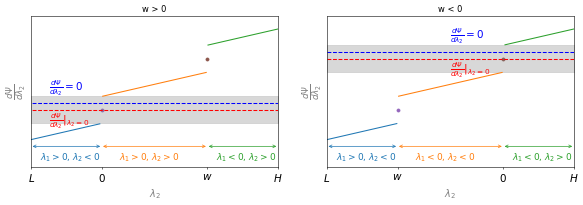

In [36]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x, eta, w, epsilon: eta*x + epsilon*(-np.sign(w-x) + np.sign(x)) + 1

def draw_line(ax, eta, w, epsilon, L, H):
    if w > 0:
        s1 = 0
        s2 = w
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1>0$, $\lambda_2>0$'
        right_text = r'$\lambda_1<0$, $\lambda_2>0$'
        s1_text = r'$\lambda_2 = 0$'
        s2_text = r'$\lambda_2 = w$'
    elif w <= 0:
        s1 = w
        s2 = 0
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1<0$, $\lambda_2<0$'
        right_text = r'$\lambda_1<0$, $\lambda_2>0$'
        s1_text = r'$\lambda_2 = w$'
        s2_text = r'$\lambda_2 = 0$'
    
    x = np.linspace(-10, s1, 100)[:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s1
    ys1 = f(x, eta, w, epsilon)
    ax.scatter(x, ys1, s=20, color='C4')    
    
    x = np.linspace(s1, s2, 100)[1:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s2
    ys2 = f(x, eta, w, epsilon)
    ax.scatter(x, ys2, s=20, color='C5') 
    
    x = np.linspace(s2, 10, 100)[1:]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    YL = f(L, eta, w, epsilon)-.5
    draw_range(ax, L, s1, YL, left_text, 3, 'C0')
    if w != 0:
        draw_range(ax, s1, s2, YL, mid_text, 4, 'C1')
    draw_range(ax, s2, H, YL, right_text, 3, 'C2')
    
    yr0 = f(0, eta, w, epsilon)
    yr1 = f(0-1e-5, eta, w, epsilon)
    yr2 = f(0+1e-5, eta, w, epsilon)
    ax.fill_between([-10, 10], [yr1, yr1], [yr2, yr2], color='grey', alpha=.3)
    y0 = yr1 + 1.5
    ax.plot([-10, 10], [y0, y0], color='b', linestyle='dashed')
    ax.plot([-10, 10], [yr0, yr0], color='r', linestyle='dashed')
    ax.text(-3, yr0-1, r"$\left.\frac{d \Psi}{d \lambda_2}\right|_{\lambda_2 = 0}$", color='r', fontsize=15)
    ax.text(-3, y0+1, r"$\frac{d \Psi}{d \lambda_2}=0$", color='b', fontsize=15)
    
def draw_range(ax, xstart, xend, y, text, adjust, color):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':color})
    ax.text(xstart+(xend-xstart-adjust)/2, y-1, text, fontsize=13, color=color)
    
def draw_arrow(ax, x, ystart, yend, text, adjust, color):
    if ystart > yend:
        delta_y = 1
    else:
        delta_y = -1
    ax.annotate(
        '', xy=(x, yend+1.5*delta_y), xycoords='data',
        xytext=(x, ystart), textcoords='data',
        arrowprops={'arrowstyle': '->', 'color':color})
    ax.text(x+adjust, ystart+delta_y*.5, text, fontsize=13, color=color)

def draw_pict(ax, w, C, eta, epsilon):
    L = max(-C, w-C)
    H = min(C, w+C)
    
    ax.set_xlim(L, H)
    ax.set_ylim(f(L, eta, w, epsilon)-2, f(H, eta, w, epsilon)+1)
    ax.set_xlabel(r"$\lambda_2$", fontsize=14, color='grey')
    ax.set_ylabel(r"$\frac{d\Psi}{d\lambda_2}$", fontsize=18, color='grey')
    
    if w > 0:
        s1 = 0
        s2 = w
        s1_text = r'$0$'
        s2_text = r'$w$'
    elif w < 0:
        s1 = w
        s2 = 0
        s1_text = r'$w$'
        s2_text = r'$0$'
    else:
        s1 = s2 = 0
        s1_text = s2_text = r'$w=0$'
    ax.set_xticks([L, s1, s2, H])
    ax.set_yticks([])
    ax.set_xticklabels([r"$L$", s1_text, s2_text, r"$H$"], fontsize=15)
    
    draw_line(ax, eta, w, epsilon, L, H)
    
def main():
    fig=plt.figure(figsize=(14,4), dpi=50)
    ax1, ax2 = fig.subplots(1, 2)
    
    eta = .3
    epsilon = 1
    C = 10
    
    ax1.set_title('w > 0')
    w = 6
    draw_pict(ax1, w, C, eta, epsilon)
    
    ax2.set_title('w < 0')
    w = -6
    draw_pict(ax2, w, C, eta, epsilon)
    
    plt.show()
    return

if __name__=="__main__":
    main()

#### One parameter is $C$

$$\left.\begin{array}{ll}
0<|\lambda_1^{new}|<C\\
\lambda_2^{new}=C \\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 = -sgn(\lambda_1^{new})\epsilon \\
y_2^{new} - t_2 \leqslant -sgn(\lambda_2^{new})\epsilon
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} = b_1^{new} \\
b^{new} \leqslant b_2^{new}
\end{array}\right. \tag{27}$$

where $b^{new}$ is set to be equal to $b_1^{new}$ which is the value that comes from the parameter that is not on the bound. We also need to prove $b_1^{new} \leqslant b_2^{new}$ to guarantee that the new threshould is available.

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \\
&= \underbrace{- \big[(\lambda_2^* - \lambda_2) \eta + (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\big] + \big[(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\big]}_{\lambda_2^* \text{ denote the optimum of } \lambda_2}\\
&= \big(-\lambda_2^* + \lambda_2^{new}\big)\eta
\end{align*} \tag{28}$$

where we have assumed that $\lambda_2^*$ is the point that gives $\frac{d\Psi}{d\lambda_2} = 0$, and because $\lambda_2^*$ is clipped by $C$, it is reasonable to think of $\lambda_2^*$ being larger than $\lambda_2^{new}$. Additionally, $\eta$ is always positive. As a result, $b_1^{new} \leqslant b_2^{new}$ is proved.

These proofs can also be easily expanded to the other one-bound-parameter cases. 

### Both of the two parameters are on the bound

In the situation that two parameters are both on the bound, we notice that there are totally 9 overall cases as follows. 

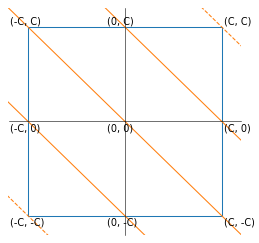

In [58]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(-1.18, -1.1, "(-C, -C)", fontsize=14)
    ax.text(-1.18, -0.1, "(-C, 0)", fontsize=14)
    ax.text(-1.18, 1.03, "(-C, C)", fontsize=14)
    
    ax.text(-0.18, -1.1, "(0, -C)", fontsize=14)
    ax.text(-0.18, -0.1, "(0, 0)", fontsize=14)
    ax.text(-0.18, 1.03, "(0, C)", fontsize=14)
    
    ax.text(1.02, -1.1, "(C, -C)", fontsize=14)
    ax.text(1.02, -0.1, "(C, 0)", fontsize=14)
    ax.text(1.02, 1.03, "(C, C)", fontsize=14)

def draw_line(ax, sign, k, style=None):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y, linestyle=style, color='C1')

def main():
    fig=plt.figure(figsize=(6,6), dpi=50)
    ax = fig.subplots(1, 1)
    draw_rec(ax)

    draw_line(ax, 1, -2, 'dashed')
    draw_line(ax, 1, -1)
    draw_line(ax, 1, 0)
    draw_line(ax, 1, 1)
    draw_line(ax, 1, 2, 'dashed')
    
    plt.show()
    return

if __name__=="__main__":
    main()

But actually, under the linear equality and box constraint, we only need to consider 7 cases, because in the case that the point lies at $(-C, -C)$ or $(C, C)$, $\lambda_1$ and $\lambda_2$ can not change along the line such that there is no need to update threshold.

For the other cases, we shall pick 3 typical case to discuss.

#### The new parameters lie at $(0, 0)$

$$\left.\begin{array}{ll}
\lambda_1^{new}=0\\
\lambda_2^{new}=0 \\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 \geqslant \underbrace{-sgn(\lambda_1^{new})\epsilon}_{\text{equal to }0} - \epsilon\\
y_1^{new} - t_1 \leqslant \underbrace{-sgn(\lambda_1^{new})\epsilon}_{\text{equal to }0} + \epsilon\\
y_2^{new} - t_2 \geqslant \underbrace{-sgn(\lambda_2^{new})\epsilon}_{\text{equal to }0} - \epsilon\\
y_2^{new} - t_2 \leqslant \underbrace{-sgn(\lambda_2^{new})\epsilon}_{\text{equal to }0} + \epsilon 
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} \geqslant b_1^{new} - \epsilon\\
b^{new} \leqslant b_1^{new} + \epsilon\\
b^{new} \geqslant b_2^{new} - \epsilon\\
b^{new} \leqslant b_2^{new} + \epsilon\\
\end{array}\right. \tag{27}$$

$b^{new}$ is available only if the inequal equation $-2\epsilon\leqslant b_1^{new}-b_2^{new}\leqslant 2\epsilon$ holds.

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \\
& = \underbrace{-\Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) -  (sgn(\lambda_2^{new}) + e)\epsilon \Big\}+ \Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \Big\}}_{\text{where }e\in[-2, 2]}\\
& = \big((sgn(\lambda_2^{new}) + e) - sgn(\lambda_2^{new})\big)\epsilon\\
& = e\epsilon \qquad\text{where }e\epsilon \text{ is the error between} \left.\frac{d \Psi}{d \lambda_2}\right|_{\lambda_2 = 0} \text{ and } \frac{d \Psi}{d \lambda_2}=0
\end{align*} \tag{28}$$

From the figure of the derivative function we presented above, when $(\lambda_2, \lambda_1)$ lies at $(0, 0)$, the correct derivative $\frac{d \Psi}{d \lambda_2}=0$ lie in the range of $\left(\left.\frac{d \Psi}{d \lambda_2}\right|_{0} - 2\epsilon, \left.\frac{d \Psi}{d \lambda_2}\right|_{0}+2\epsilon \right)$.


#### The new parameters lie at $(0, C)$

$$\left.\begin{array}{ll}
\lambda_1^{new}=0\\
\lambda_2^{new}=C \\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 \geqslant \underbrace{-sgn(\lambda_1^{new})\epsilon}_{\text{equal to }0} - \epsilon\\
y_1^{new} - t_1 \leqslant \underbrace{-sgn(\lambda_1^{new})\epsilon}_{\text{equal to }0} + \epsilon\\
y_2^{new} - t_2 \leqslant -sgn(\lambda_2^{new})\epsilon \\
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} \geqslant b_1^{new} - \epsilon\\
b^{new} \leqslant b_1^{new} + \epsilon\\
b^{new} \leqslant b_2^{new} \\
\end{array}\right. \tag{27}$$

$b^{new}$ is available only if $b_1^{new} - \epsilon \leqslant b_2^{new}$.

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \\
& = \underbrace{-\Big\{(\lambda_2^{*} - \lambda_2) \eta - (sgn(\lambda_1^{new}) -  (sgn(\lambda_2^{new}) + e)\epsilon \Big\}+ \Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \Big\}}_{\text{where }e\in[-1, 1]\quad \lambda_2^* \text{ denotes the optimum of the parameter } \lambda_2}\\
& = -(\lambda_2^* - \lambda_2^{new})\eta+e\epsilon \qquad\text{where }e\epsilon \text{ is the error between} \left.\frac{d \Psi}{d \lambda_2}\right|_{\lambda_2 = 0} \text{ and } \frac{d \Psi}{d \lambda_2}=0\\
&\leqslant \epsilon
\end{align*} \tag{28}$$

- $\lambda_1^{new}=0$. According to the figure of the derivative function we presented above, we should introduce the error $e\epsilon$ to indicate the error between $\left(\left.\frac{d \Psi}{d \lambda_2}\right|_{0} - 1\epsilon, \left.\frac{d \Psi}{d \lambda_2}\right|_{0}+1\epsilon \right)$.
- $\lambda_2^{new}=C$. The optimum of $\lambda_2$ is clipped by $C$, it is therefore reasonable to think of the optimum of $\lambda_2$, which is denoted by $\lambda_2^*$, being larger than $C$.

#### The new parameters lie at $(-C, C)$

$$\left.\begin{array}{ll}
\lambda_1^{new}=-C\\
\lambda_2^{new}=C \\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} - t_1 \geqslant -sgn(\lambda_2^{new})\epsilon \\
y_2^{new} - t_2 \leqslant -sgn(\lambda_2^{new})\epsilon \\
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} \geqslant b_1^{new} \\
b^{new} \leqslant b_2^{new} \\
\end{array}\right. \tag{27}$$

$b^{new}$ is available only if $b_1^{new} \leqslant b_2^{new}$.

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \\
& = \underbrace{-\Big\{(\lambda_2^{*} - \lambda_2) \eta - (sgn(\lambda_1^{new}) -  (sgn(\lambda_2^{new}))\epsilon \Big\}+ \Big\{(\lambda_2^{new} - \lambda_2) \eta - (sgn(\lambda_1^{new}) - sgn(\lambda_2^{new}))\epsilon \Big\}}_{\lambda_2^* \text{ denotes the optimum of } \lambda_2}\\
& = -(\lambda_2^* - \lambda_2^{new})\eta
\end{align*} \tag{28}$$

Because the optimum of $\lambda_2$ is clipped by $C$, the optimum is larger than $\lambda_2^{new}=C$.

In the cases that two parameters are both on the bound, we generally set $b^{new}$ to the halfway of $b_1^{new}$ and $b_2^{new}$.

### Conclusion of threshold update

Then we can obtain the new threshold $b^{new}$ 

$$\bbox[#e0f0ff]{
b_i^{new} =
- E_i -  (\lambda_1^{new} - \lambda_1) k(\mathbf{x}_i, \mathbf{x}_1) - (\lambda_2^{new} -\lambda_2) k(\mathbf{x}_i, \mathbf{x}_2) + b - sgn(\lambda_i^{new})\epsilon }$$


We shall obtain two thresholds, $b_1^{new}$ for $\lambda_1^{new}$ and $b_2^{new}$ for $\lambda_2^{new}$. 
- When the new parameters $\lambda_1^{new}$ and $\lambda_2^{new}$ are both not at the bounds, these two thresholds are equal, and the new thresholds is set to be $b^{new} = b_1^{new} = b_2^{new}$.
- When there is only one parameter not at the bound, SMO chooses the threshold of which parameter not at the bound.
- When two parameters are both at the bound, SMO chooses the threshold to be halfway between $b_1^{new}$ and $b_2^{new}$.





## How to pick $\lambda_1$ and $\lambda_2$

In the previous part we mainly focus on how to evaluate the value of $\lambda_2$, however, the effects on $\lambda_1$ and on $\lambda_2$ are analogous, because this process is looking for the optimum of $\lambda_1$ and $\lambda_2$ that lie in the region of $[-C, C]$ and obey the linear equality constraints as well as minimize the objective function. Note that this is a local optimum, because the linear equality constraint depends on $\lambda_1 + \lambda_2 = w$, where $w$ will change along the SMO progresses and be stable finally.

As a result, we may need multiple loops of optimizations to obtain the final result.

### Pick the first parameter

The outer loop picks $\lambda$ following the rules below.

1. In the first loop, we shall pick every $\lambda_n$ as the first parameter because they are just initialized.
2. In the subsequent loops, we shall pick the non-bound $\lambda_n$ as the first parameter because these examples are most likely to violate the KKT conditions. We keep running this step until all the non-bound $\lambda_n$ obey the KKT conditions.
3. In the last loop, we shall pick every $\lambda_n$ as the first parameter for KKT condition validation. If the validation fails, step 2 is invoked again.

And before going into the inner loop to pick the second parameter, we shall check if the picked first parameter violate the KKT conditions. If not, we should discard the parameter and continue to the next iteration. <font color='red'>In a word, the first picked parameter has to be KKT conditions violated, because the Osuna's theorem suggests that only if at least one of the parameter violated the KKT conditions the optimization process can decrease the objective function.</font>

### Pick the second parameter

The goal of the inner loop is to pick one parameter from the array of parameters. Now suppose that the index of the first parameter is given by $i$ and $j$ denote the index of the second parameter that will be selected. The order of selection should follow the rules as follows.

1. SMO firstly select the parameter on the index $j$, where $j$ gives the biggest $|E_1 - E_2|$, namely $|E_i - E_j|$. Because SMO want to maximize the size of step taken during joint optimization. From equation (13), we know that the step size is given by $\frac{|E_1 - E_2|}{\eta}$, however, evaluating the kernel function is time consuming, so SMO approximates the step size by the absolute value of the numerator in the equation.
2. If the above heuristic dose not make positive progress, then SMO starts iterating through the non-bound parameters.
3. If non of the non-bound examples make positive progress, then SMO starts iterating through the remaining parameters.


------------

# Overall procedure

1. Initialization.
  - The parameters should be in the range $[-C, C]$ and satisfy the linear equality constraints.
  - Using the initialized parameters to compute the errors.
2. The outer loop is to pick the first parameter that violate the KKT conditions. The rules of iterations is as follows:
  - If this is a initial loop or a validation loop, iterate all the parameters.
  - Otherwise, iterate the non-bound parameters.
3. The inner loop is to pick the second parameter and then optimize these two picked parameters. The precedence is as follows.
  - The error of the chosen example should give the biggest difference from the error of the example of the first parameter.
  - Iterate the non-bound parameters.
  - Iterate the remaining parameters.
4. Optimize the two chosen parameters.
  - Compute the range $[L, H]$ for $\lambda_2$.
  - If $L$ is equal to $H$, then current optimization fails.
  - Compute the second-order derivative with respect to $\lambda_2$.
  - Evaluate the new $\lambda_2^{new}$ on the discontinuous function.
  - If $\lambda_2^{new}$ is equal to $\lambda_2$, then current optimization fails.
  - Compute the new threshold $b^{new}$.
  - Compute the new error for the next optimization.


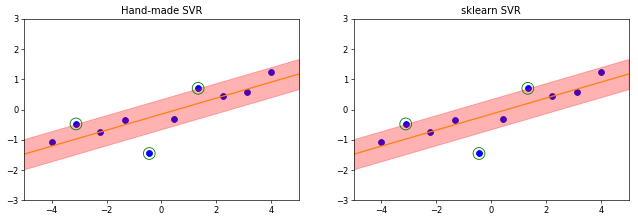

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.svm import SVR

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.WARNING)
    return logger

logger = getLogger("SMO for Regression")

MAX_DEPTH = 20
SPLIT_SECTIONS = 10

f = lambda x: .3*x

kernel = lambda x, y: x@y

def gen_data(n):
    noise = np.random.normal(0, .5, n)
    X = np.linspace(-4, 4, n)
    T = f(X) + noise
    return X.reshape(-1, 1), T

def draw_points(ax, X, T):
    for i in range(len(T)):
        ax.scatter(X[i][0], T[i], s=50, color='blue')
    return

def kernel_matrix(X):
    length = len(X)
    K = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            K[i][j] = kernel(X[i], X[j])
    return K

class SMO:
    A = None
    X = None
    T = None
    E = None
    b = 0.0
    C = 0.0
    K = None
    epsilon = 0.0
    eps = 1e-4
    
    def __init__(self, X, T, C, epsilon):
        length = len(T)
        self.X = X
        self.T = T
        self.C = C
        self.epsilon = epsilon
        self.K = np.copy(kernel_matrix(X))
        # linear equality
        self.A = np.zeros(length)
        self.A[:length//2] = C/2
        self.A[length//2:length//2*2] = -C/2
        
#         ynb = np.zeros(length)
#         for i in range(length):
#             ynb[i] = self.A@kernel(X, X[i])
        ynb = self.A @ self.K
        self.b = np.sum(T - ynb)/length
        self.E = ynb + self.b - T
        logger.info("Initialize \n A = {} \n b = {} \n E = {}".format(self.A, self.b, self.E))
        return
    
    def meet_KKT(self, i):
        # from the equation y = A @ kernel(X, x) we can find that X will expand the errors
        eps = self.eps*len(self.T)
        epsilon = self.epsilon
#         y = self.A @ kernel(self.X, self.X[i]) + self.b
        y = self.A @ self.K[i] + self.b
        logger.info("A[{}] = {} t = {}, y = {}".format(i, self.A[i], self.T[i], y))
        if abs(self.A[i])<eps and abs(self.T[i] - y)<epsilon:
            return 1
        if abs(self.A[i])>0 and abs(self.A[i])<self.C and abs(abs(self.T[i]-y)-epsilon)<eps:
            return 1
        if abs(self.A[i]-self.C)<eps and abs(self.T[i]-y)>epsilon:
            return 1
        return 0
    
    def optimize(self, i, j):
        if i==j:
            return 0
        a1 = self.A[i]
        a2 = self.A[j]
        x1 = self.X[i]
        x2 = self.X[j]
        t1 = self.T[i]
        t2 = self.T[j]
        E1 = self.E[i]
        E2 = self.E[j]
        C  = self.C
        b  = self.b
#         k11 = kernel(x1, x1)
#         k22 = kernel(x2, x2)
#         k12 = kernel(x1, x2)
        k11 = self.K[i][i]
        k22 = self.K[j][j]
        k12 = self.K[i][j]
        eps = self.eps
        epsilon = self.epsilon
        w = a1 + a2
        
        L = max(-C, w-C)
        H = min(C, w+C)
        if L==H:
            logger.info("[{},{}] L==H={}".format(i, j, L))
            return 0
        eta = k11 + k22 - 2*k12
        
        if eta>0:
            if w > 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < 0:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(0))/eta
                    if cand_a2_new <= 0:
                        a2new = 0
                    elif cand_a2_new < w:
                        a2new = cand_a2_new
                    else:
                        cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                        if cand_a2_new <= w:
                            a2new = w
                        elif cand_a2_new < H:
                            a2new = cand_a2_new
                        else:
                            a2new = H
            elif w < 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < w:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(0))/eta
                    if cand_a2_new <= w:
                        a2new = w
                    elif cand_a2_new < 0:
                        a2new = cand_a2_new
                    else:
                        cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                        if cand_a2_new <= 0:
                            a2new = 0
                        elif cand_a2_new < H:
                            a2new = cand_a2_new
                        else:
                            a2new = H
            elif w == 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < 0:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                    if cand_a2_new <= 0:
                        a2new = 0
                    elif cand_a2_new < H:
                        a2new = cand_a2_new
                    else:
                        a2new = H

            logger.info("[{},{}] a2new = {} L = {}, H = {}".format(i, j, a2new, L, H))
            logger.info("eta = {}, E = {}".format(eta, self.E))
        else:
            raise Exception("second derivative non-positive!")
        if abs(a2 - a2new) < eps:
            logger.info('[{},{}] L={}, H={}, a2new={}'.format(i, j, L, H, a2new))
            logger.info('[{},{}] eta {} error {}'.format(i, j, eta, self.E))
            logger.info("[{},{}] a2==a2new = {}".format(i, j, a2new))
            return 0
        a1new = a1+a2-a2new
        self.A[i] = a1new
        self.A[j] = a2new
        
        n = 0
        b1new = 0
        b2new = 0
        
        if abs(a1new) > 0 and abs(a1new) < C:
            b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + b - np.sign(a1new)*epsilon
            n = 1
            logger.info("[{},{}] a1 new non bound".format(i, j))
        elif abs(a2new) > 0 and abs(a2new) < C:
            b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + b - np.sign(a2new)*epsilon
            n = 1
            logger.info("[{},{}] a2 new non bound".format(i, j))
        else:
            b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + b - np.sign(a1new)*epsilon
            b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + b - np.sign(a2new)*epsilon
            n = 2
            logger.info("[{},{}] a1 new a2 new bound".format(i, j))
        bnew = (b1new + b2new)/n
        self.b = bnew
        
#         for k in range(len(self.X)):
#             self.E[k] = self.E[k] + (a1new-a1)*kernel(x1, self.X[k]) + (a2new-a2)*kernel(x2, self.X[k]) + (bnew - b)
        self.E = self.E + (a1new-a1)*self.K[i] + (a2new-a2)*self.K[j] + (bnew - b)
        return 1

    def pair_optimize(self, i):
        length = len(self.T)
        j = np.argmax(np.abs(self.E[i] - self.E))
        update = self.optimize(i, j)
        if update==1:
            logger.info("[{},{}] A = {}".format(i, j, self.A))
            return update
        for j in range(length):
            if abs(self.A[j])>0 and abs(self.A[j])<self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        for j in range(length):
            if abs(self.A[j])<=0 or abs(self.A[j])>=self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        return 0

    def train(self):
        length = len(self.T)
        finished = 0
        initialized = 1
        count = 0
        while finished != 1:
            count += 1
            if count == 1000:
                logger.warning("too long!!!!!")
                break
            if initialized==1 or validation==1:
                initialized = 0
                validation = 0
                update = 0
                for i in range(length):
                    update = self.pair_optimize(i)
                if update == 0:
                    finished = 1
            else:
                while True:
                    # find the multiplier that violate KKT condition
                    idx = -1
                    for i in range(length):
                        if abs(self.A[i])>0 and abs(self.A[i])<self.C:
                            is_kkt = self.meet_KKT(i)
                            logger.info("[{}] non bound update meet KKT:{}".format(i, is_kkt))
                            if is_kkt==0:
                                idx = i
                                self.pair_optimize(i)
                    # if all non-bound multipliers meet the KKT conditions
                    if idx == -1:
                        break
                validation = 1
        return

    def draw(self, ax):
        epsilon = self.epsilon
        logger.info("lagrange multiplier {}".format(self.A))
        x = np.array([-5, 5])
        y = np.zeros(x.shape)
        w = self.A@self.X
        logger.info("w = {}, b = {}".format(w, self.b))
        y[0] = self.b + w[0] * x[0]
        y[1] = self.b + w[0] * x[1]
        ax.plot(x, y, color='C1')
        
        ax.fill_between(x, y-epsilon, y+epsilon, color='r', alpha=.3)
        
        for i in range(len(self.T)):
            if abs(self.A[i]) > 1e-10:
                ax.scatter(self.X[i][0], self.T[i], s=200, edgecolors='green', facecolors='none')
        return

def sklearn_SVR(ax, X, T, C, epsilon):
    svr = SVR(kernel='linear', C= C, epsilon=epsilon)
    svr.fit(X, T)
    n = np.sum(svr.n_support_)
    w = svr.coef_.reshape(-1, 1)
    idxs = svr.support_
    a = svr.dual_coef_.reshape(-1,1)
    b = svr.intercept_ 
    y = svr.predict(X[idxs])
    logger.info("a = {}\n idxs = {}\n w = {}\n b={}".format(a, idxs, w, b))
    
    x = np.array([-5, 5])
    y = np.zeros(x.shape)
    y[0] = b + w[0] * x[0]
    y[1] = b + w[0] * x[1]
    ax.plot(x, y, color='C1')
    
    ax.fill_between(x, y-epsilon, y+epsilon, color='r', alpha=.3)
    
    ax.scatter(X[idxs], T[idxs], s=200, edgecolors='green', facecolors='none')
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X, T = gen_data(10)
    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made SVR")
    ax2.set_title("sklearn SVR")
    draw_points(ax1, X, T)
    draw_points(ax2, X, T)

    C = 10
    epsilon = .5
    
    sklearn_SVR(ax2, X, T, C, epsilon)
    
    smo = SMO(X, T, C, epsilon)
    smo.train()
    smo.draw(ax1)
    
    plt.show()

if __name__=="__main__":
    main()